In [12]:
from __future__ import division
import pandas as pd
import numpy as np
import random

In [13]:
global df
global alpha
global theta
global X
global y
global lmbda
global delta
global train
global test

In [14]:

#Function to import data

def import_data():
    global df
    
    df = pd.read_excel('counter-strike/playerStatsnumeric.xlsx')
    df.dropna(inplace=True)
    return

In [15]:
#Function to standardize input features

def stand_norm():
    global df
    
    backup = df
    resp = df['ADR']
    df.drop(['ADR'], axis=1, inplace=True)
    
    cols = list(df)
    
    stats = df.describe()
    for col in cols:
        def func(x):
            return (x-stats[col][1])/stats[col][2]

        df[col] = df[col].apply(func)
    df['ADR'] = resp
    return

In [16]:
#Function to create 2nd degree polynomial features as L2-Regularization isn't really useful with a few number of features.

def feature_map():
    global df
    
    cols = list(df)
    
    backup = df
    resp = df['ADR']
    df.drop(['ADR'], axis=1, inplace=True)

    nums = range(0,12)
    for i in range(0,18):
        first = random.choice(nums)
        second = random.choice(nums)
        name = cols[first] + "x" + cols[second]
        df[name] = df[cols[first]].multiply(df[cols[second]], axis=0)

    df['ADR'] = resp
    return

In [17]:
#Function to compute J_theta (or the cost function)

def costFunc(X,y,theta,length):
    global lmbda
    
    sq_diff = np.sum((np.sum(np.array(X) * theta, axis=1) - np.array(y))**2)
    cost = (1/(2*(length))) * (sq_diff + (lmbda * np.sum(theta[1:]**2)))
    return cost

In [18]:
#Function to run batch gradient descent algorithm to optimize the cost fuction of the problem.

def gradientDesc(X,y,train,lmbda,alpha,n_iter):
    global theta
    
    costs = list()
    for i in range(0, n_iter):
        theta[0] = theta[0] - (alpha/len(train)) * np.sum((np.sum(np.array(X) * theta, axis=1) - np.array(y)))
        for j in range(1,len(theta)):
            theta[j] = theta[j]*(1 - ((alpha*lmbda)/len(train))) - (alpha/len(train)) * (np.sum((np.sum(np.array(X) * theta, axis=1) - np.array(y)) * np.array(X.ix[:,j])))
        costs.append(costFunc(X, y, theta, len(train)))
    return costs

In [31]:
def main(A=None):
    global alpha
    global df
    global theta
    global X
    global y
    global lmbda
    global delta
    global train
    global test
    
    lmbda = 1
    alpha = 0.005
    n_iter = 1500
    
    #To import, standardize and map features to achieve final data set.
    import_data()
    stand_norm()
    feature_map()
    
    
    df = df.iloc[np.random.permutation(len(df)-1)].reset_index(drop=1) # To shuffle the dataset
    train_size = int(round(len(df) * 0.75)) # Training set size: 75% of full data set.
    train = df[:train_size]
    test = df[train_size:]
    
    Xn    = pd.Series([1] * len(train)) # Creation feature X_0 which is to hold a value of 1.
    X     = pd.concat([Xn, train.drop(['ADR'], axis=1)], axis=1) #Feature set in X
    y     = train['ADR'] #Response variable in y
    theta = [0.0] * (len(list(X))) #Theta or parameter vector initialized with 1
    theta = np.array(theta)
    
    #To train on train data set
    costs = gradientDesc(X,y,train,lmbda,alpha,n_iter)
    
    Xn    = pd.Series([1] * len(test))
    test.reset_index(drop=1, inplace=True)
    test_x = pd.concat([Xn, test.drop('ADR',axis=1)], axis=1)
    test_y = test['ADR']
    
    #To test model on test set
    predictions = test_x * theta
    residuals = np.sum(np.array(test_x) * theta, axis=1) - test_y
    residuals = [(abs(a)/b)*100 for a,b in zip(residuals,test_y)]
    cost = sum(residuals)/len(residuals)
    
    return cost
    #Normal Equation method comparison
    #theta_num  = np.dot(np.dot((np.linalg.inv(np.dot(np.matrix.transpose(np.array(X)),np.array(X)))), np.matrix.transpose(np.array(X))), np.array(y))
    #cost = costFunc(X,y,theta_num)

In [29]:
if __name__ == '__main__':
    
    cost = main()
        
    print('Mean Absolute Percentage Error of our Model on test set:',cost,'%')

IndexError: list index out of range

In [35]:
#Now we use the built-in ridge regression module in sci-kit learn on our data set to compare performance with the one we built above.

from sklearn.linear_model import Ridge
def main(A=None):
    global alpha
    global df
    global theta
    global X
    global y
    global lmbda
    global delta
    global train
    global test
    

In [38]:
clf = Ridge(alpha=1, solver='sag', max_iter=1500) #We use the stochastic averaged gradient descent algorihtm since batch GD isn't available
X = np.array(X)
y = np.array(y)    

model = clf.fit(X, y)

Xn    = pd.Series([1] * len(test))
test.reset_index(drop=1, inplace=True)
test_x = pd.concat([Xn, test.drop('ADR',axis=1)], axis=1)
test_y = test['ADR']

pred = model.predict(test_x)
residuals = pred - test_y
residuals = [(abs(a)/b)*100 for a,b in zip(residuals,test_y)]
cost = sum(residuals)/len(residuals)
print('Mean Absolute Percentage Error of built-in model on test set:',cost,'%')

NameError: name 'X' is not defined

In [39]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#import sklearn
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import seaborn as sns

C:\Users\Pornima\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
def getacf(x,nlags):
    a = [] 
#    print nlags,len(x),x[0]
    for i in range(nlags):
        c = 0.0
        for j in range(len(x)-i):
            c = c + x[j]*x[j+i] 
#        print i, c    
        c  = c /len(x) 
        a.append(c) 
    return a

In [41]:
plt.close('all')

In [49]:
df = pd.read_csv('counter-strike/playerStatsnumeric.csv').dropna()
df.index = range(len(df))
#df.info()
dumies = pd.get_dummies(df[['Kills', 'Deaths','KAST%','Rating']])
y = df.ADR

In [51]:
X_ = df.drop(['Player','Kills','Deaths','ADR','KAST%','Rating'],axis=1).astype('float64')

In [55]:
#FEATURES
X = pd.concat([X_, dumies[['Kills', 'Deaths','KAST%','Rating']]], axis=1)

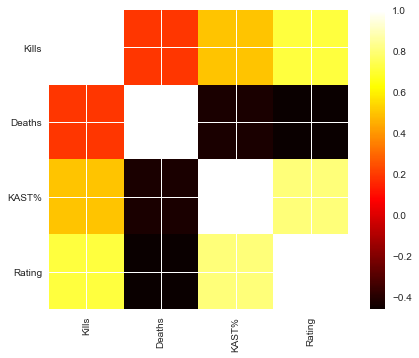

In [56]:
# correlation of features 

xcorr = X.corr()
fnames = list(X)
nf = len(X.columns)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(xcorr,cmap='hot')
#cax = ax.matshow(xcorr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,nf,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(fnames,rotation="90")
ax.set_yticklabels(fnames)
plt.show()

In [67]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [68]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

Kills     0.347913
Deaths   -0.128511
KAST%     0.126288
Rating    7.752628
dtype: float64
208.728012896


In [70]:
#Predict Output
predicted= ridge2.predict(X_test)
predicted

array([ 77.11654865,  71.5286401 ,  72.22559745, ...,  72.15590959,
        68.43491582,  71.58269725])

In [69]:
ridge2.score(X,y)

0.43486288631915854

In [57]:
Xt = X 
Yt = y

In [58]:
#----- least squares 
# Simulated data 
NF = 2  # number of features 
k = 400   # number of observations 

In [59]:
# Data synthesis 
nord = 2
Xt = np.zeros((k,NF))
Yt = np.zeros((k))
w = np.zeros((nord)) 

In [60]:
xmin = 0.0
xmax = 1.0
#X[:,0] = np.linspace(xmin,xmax,k)
Xt[:,0] = np.random.rand(k)
#X[:,1] = X[:,0]**2
Xt[:,1] = np.random.rand(k)

In [61]:
w[0] = 0.65
w[1] = 0.9

In [63]:
Yt = Xt.dot(w)

In [64]:
# add noise
var = 0.05
mu, sigma = 0.0, np.sqrt(var) 
g = mu + sigma * np.random.randn(k) 

In [65]:
Yt = Yt + g 